In [45]:
#Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
#Reading the dataset:

df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Performing EDA on the dataset:

df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.641196,4.667940,7.638439,36944.880399,0.043189
std,2.911614,5.084956,8.643845,38888.793856,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.490000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2020.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

C:\Users\Zabi\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales data distribution')

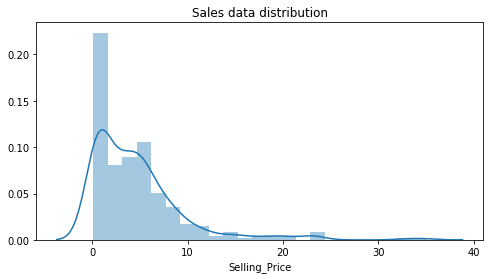

In [8]:
fig=plt.figure(figsize=(8,4))
sns.distplot(df['Selling_Price'])
plt.title('Sales data distribution')

In [11]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.237854,-0.045647,-0.524542,-0.181647
Selling_Price,0.237854,1.000000,0.878976,0.028081,-0.088535
Present_Price,-0.045647,0.878976,1.000000,0.202698,0.007856
Kms_Driven,-0.524542,0.028081,0.202698,1.000000,0.089222
Owner,-0.181647,-0.088535,0.007856,0.089222,1.000000


In [12]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [13]:
df.columns

Index([u'Car_Name', u'Year', u'Selling_Price', u'Present_Price', u'Kms_Driven',
       u'Fuel_Type', u'Seller_Type', u'Transmission', u'Owner'],
      dtype='object')

In [14]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
final_dataset['Current_Year']=2021

In [16]:
final_dataset['no_year']=final_dataset['Current_Year']-final_dataset['Year']

In [17]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [20]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [21]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [22]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878976,0.028081,-0.088535,NaN,-0.237854,0.552338,-0.540734,-0.551457,-0.366460
Present_Price,0.878976,1.000000,0.202698,0.007856,NaN,0.045647,0.471038,-0.463129,-0.512898,-0.348273
Kms_Driven,0.028081,0.202698,1.000000,0.089222,NaN,0.524542,0.164622,-0.165109,-0.101370,-0.162526
Owner,-0.088535,0.007856,0.089222,1.000000,NaN,0.181647,-0.054582,0.056784,0.124269,-0.050316
Current_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_year,-0.237854,0.045647,0.524542,0.181647,NaN,1.000000,-0.079290,0.074746,0.042992,-0.002181
Fuel_Type_Diesel,0.552338,0.471038,0.164622,-0.054582,NaN,-0.079290,1.000000,-0.979890,-0.354399,-0.094800
Fuel_Type_Petrol,-0.540734,-0.463129,-0.165109,0.056784,NaN,0.074746,-0.979890,1.000000,0.362233,0.087280
Seller_Type_Individual,-0.551457,-0.512898,-0.101370,0.124269,NaN,0.042992,-0.354399,0.362233,1.000000,0.063240
Transmission_Manual,-0.366460,-0.348273,-0.162526,-0.050316,NaN,-0.002181,-0.094800,0.087280,0.063240,1.000000


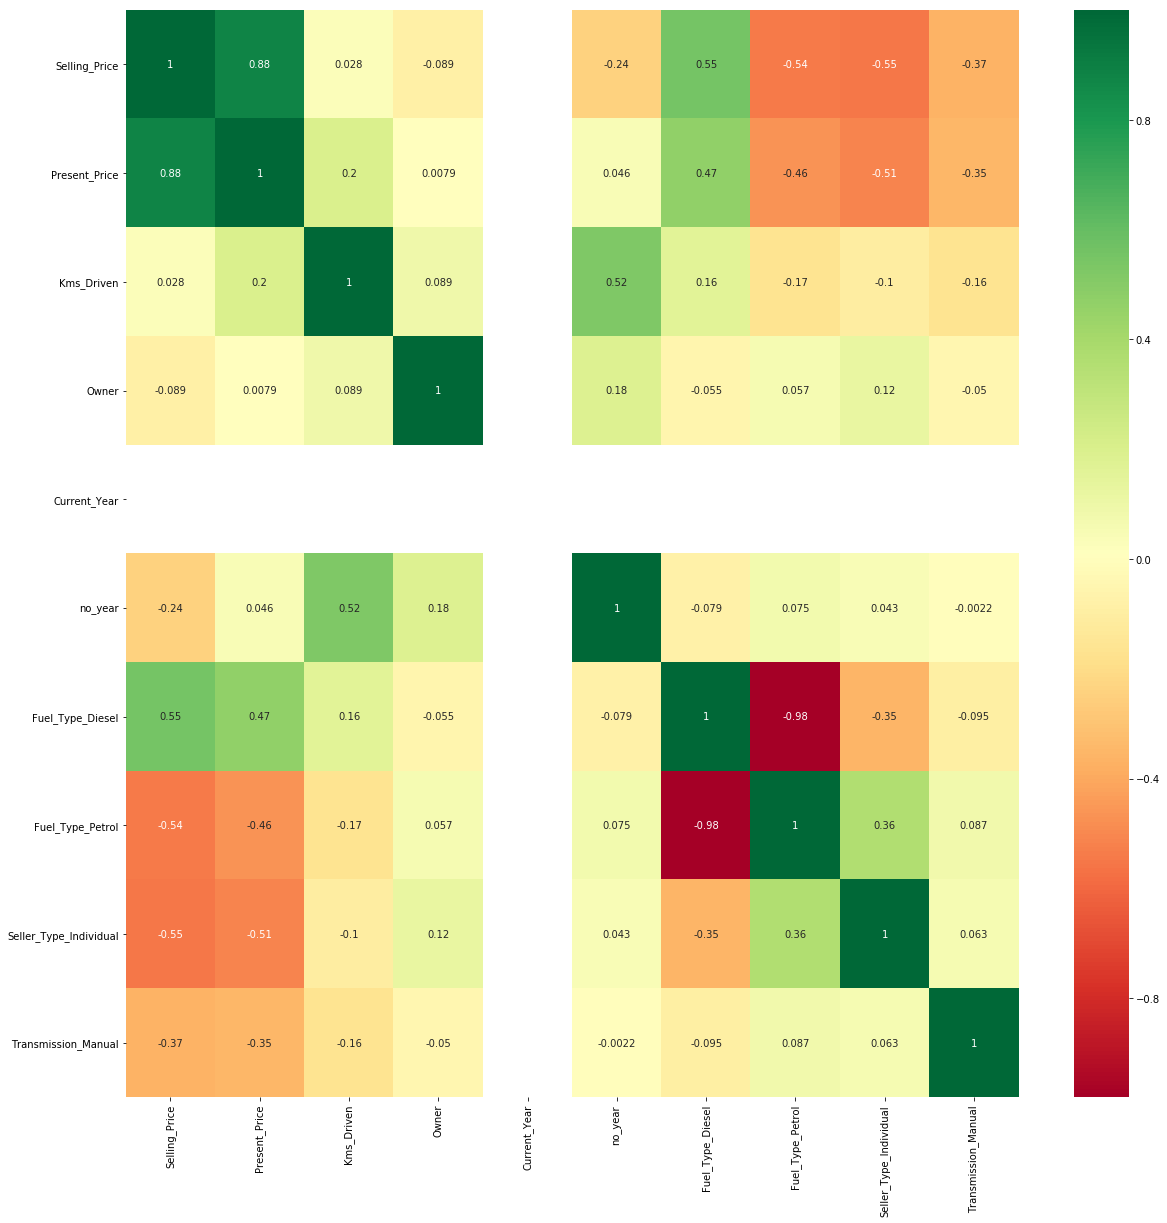

In [26]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
#Preparing the data for the model:

y=final_dataset['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
X=final_dataset.drop(['Selling_Price'],axis=1)
X.head()

,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,2021,7,0,1,0,1
1,9.54,43000,0,2021,8,1,0,0,1
2,9.85,6900,0,2021,4,0,1,0,1
3,4.15,5200,0,2021,10,0,1,0,1
4,6.87,42450,0,2021,7,1,0,0,1


In [34]:
model=ExtraTreesRegressor()
model.fit(X,y)

C:\Users\Zabi\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
print(model.feature_importances_)

[0.44172859 0.04002991 0.00046328 0.         0.08041978 0.18507074
 0.01251784 0.13001825 0.10975161]


In [37]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [31]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

C:\Users\Zabi\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Zabi\Anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [39]:
#Fitting the model

random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
#Predicted values:

ypred=random_forest_regressor.predict(X_test)

In [49]:
ypred

array([ 8.795,  0.563,  3.87 ,  3.13 ,  9.428,  4.705,  2.985,  7.05 ,
        0.255,  5.595,  6.62 ,  4.115,  0.291,  8.6  ,  2.135,  0.641,
        0.641,  0.439,  9.105,  4.265,  1.18 ,  6.65 ,  0.398,  9.57 ,
        0.568,  7.07 ,  0.555,  0.257,  3.12 ,  1.785,  0.453,  3.31 ,
        6.175,  8.51 ,  0.545,  5.18 ,  7.875,  5.935,  6.62 ,  5.32 ,
       14.27 ,  0.747,  0.373,  0.469,  6.655,  7.375,  0.404,  5.101,
       15.311,  2.515,  7.19 ,  0.536,  6.48 ,  0.577,  0.756,  0.541,
        0.34 ,  4.191,  0.522,  0.2  ,  8.436,  7.375,  2.406,  2.845,
        0.475,  3.48 ,  2.71 ,  1.127,  0.855,  0.575,  0.568,  4.09 ,
        4.965,  0.538,  3.146,  3.96 ,  0.453,  1.63 ,  7.115,  5.266,
        4.41 ,  4.01 ,  2.705,  5.05 ,  1.102,  0.572,  2.775,  2.13 ,
        5.266,  1.094,  5.69 ])

In [40]:
#Evaluating the performance of our model:

train_acc=random_forest_regressor.score(X_train,y_train)
test_acc=random_forest_regressor.score(X_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

('Training Accuracy: ', 98.11, '%')
('Testing Accuracy: ', 94.41, '%')
